In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, classification_report

#### Instructions ####
1. Apply the Random Forest algorithm to predict the TARGET_B.
   Please note that this column suffers from class imbalance. **Fix the class imbalance using upsampling**.
   
2. Discuss the model predictions and it's impact in the business scenario.
   Is the cost of a false positive equals to the cost of the false negative?
   How much the money the company will not earn because of misclassifications made by the model?
   
3. Sklearn classification models are trained to maximize the accuracy.
   However, another error metric will be more relevant here. Which one?
   Please checkout make_scorer alongside with GridSearchCV in order to train the model to maximize the error metric of interest in this case.

#### Question 1.

In [2]:
numerical = pd.read_csv('~/Desktop/data_analytics/Week_7/Day_4/Morning/lab-random-forests/files_for_lab/numerical.csv')
categorical = pd.read_csv('~/Desktop/data_analytics/Week_7/Day_4/Morning/lab-random-forests/files_for_lab/categorical.csv')
target = pd.read_csv('~/Desktop/data_analytics/Week_7/Day_4/Morning/lab-random-forests/files_for_lab/target.csv')

data = pd.concat([numerical, categorical, target], axis = 1)
data['TARGET_B'].value_counts()

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

In [3]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [4]:
y = data['TARGET_B']
X = data.drop(['TARGET_B', 'TARGET_D'], axis = 1) 
X_cat  = X.select_dtypes(object)

levels = [ list(X[col].unique()) for col in X_cat.columns ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train_num = X_train.select_dtypes(np.number)
X_test_num  = X_test.select_dtypes(np.number)

X_train_cat = X_train.select_dtypes(object)
X_test_cat  = X_test.select_dtypes(object)

encoder = OneHotEncoder(drop = 'first', categories = levels).fit(X_train_cat)

X_train_cat_encoded_np = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded_np  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded_np, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded_np,  columns=encoder.get_feature_names_out(), index=X_test.index)

X_train = pd.concat([X_train_num, X_train_cat_encoded_df], axis = 1)
X_test  = pd.concat([X_test_num, X_test_cat_encoded_df], axis = 1)

In [5]:
sm = SMOTE(random_state = 12) 
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train, y_train)

print(y_train_SMOTE.value_counts())

TARGET_B
0    72486
1    72486
Name: count, dtype: int64


The accuracy for the Random Forest in the TRAIN set is 1.00
The accuracy for the Random Forest in the TEST  set is 0.95


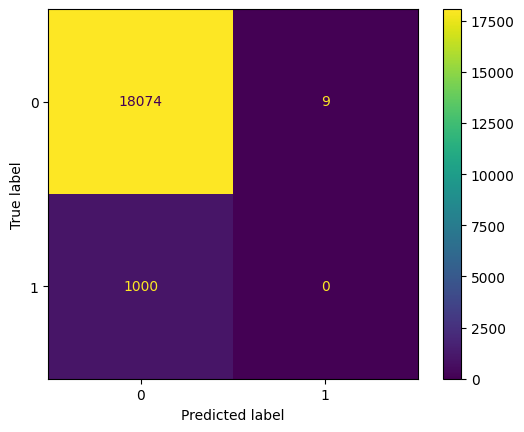

In [6]:
clf = RandomForestClassifier(class_weight = 'balanced', random_state = 12)

clf.fit(X_train_SMOTE, y_train_SMOTE)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_SMOTE, y_train_SMOTE)))
print("The accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_test_pred = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels = clf.classes_);
disp.plot()


In [7]:
cross_val_scores = cross_val_score(clf, X_train_SMOTE, y_train_SMOTE, cv = 5)

print("The mean accuracy of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean accuracy of the folds was 0.97


In [8]:
cross_val_scores

array([0.87442663, 0.99882738, 0.99872387, 0.99875836, 0.99899979])

#### Question 2.

TARGET_B is the column "yes" or "no" for money donation and column TARGET_D the amount $ donated. So in this case where the prediction is related to if a person will or not donate, we have to minimize the false negatives where the person will actually donate and the prediction says the person will not. So the costs of the false negatives will be higher for the company due to missed donations. 

In [9]:
# Cost of the false negatives

fn = X_test.index[(y_test == 1) & (y_test_pred == 0)]
fn_filter = data.loc[fn]
fn_filter

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
19972,28,74.000000,3,9,0,0,38,28,42,9,4,3,9,1425,385,591,99,0,0,49,51,95,3,1,1,2,0,0,0,0,0,0,0,0,1,0,1,34,43,48,38,47,50,23,45,37,18,13,22,16,11,14,16,8,20,18,34,15,13,32,10,29,25,40,35,19,8,3,51,17,8,23,162,241,78,77,8,21,13,6,0,0,0,535,572,4,3,63,37,88,12,10,27,65,47,17,77,23,11,2,9,20,22,10,17,54,24,1,1,0,1,1,2,13,58,0,4,42,51,52,13,4,20,1,0,20,11,6,0,5,24,70,93,4900.0,329.0,534.0,226,236,250,265,9934,25,33,21,16,6,0,0,0,0,20,34,21,16,8,0,0,0,0,34,3,37,16,59,41,13,76,17,1,0,0,1,1,3,2,0,5,17,21,4,61,60,67,54,61,52,66,50,35,27,21,15,4,4,14,14,0,1,13,4,14,4,9,4,3,0,9,13,6,1,2,24,2,6,4,5,6,7,5,7,9,4,3,12,71,1,0,120,6,18,37,23,6,4,5,3,20,2,15,5,0,0,0,19,38,2,28,13,42,21,1,11,1,9,0,0,4,3,0,1,0,0,1,1,0,3,32,96,0,0,4,92,55,14,5,34,0,6,6,8,36,64,0,0,2,8,68,20,0,2,99,0,98,99,90,6,2,6,9,15,35,6,12,30.0,7,5,2.0,5.0,5.0,8,4.285714,35877,0,4,23,FL,21,H,F,2,L,D,B,S,3,94,1,24,1,95,9,93,10,95,12,93,10,1,5.0
19307,0,61.611649,5,9,0,0,31,34,66,0,7,3,9,723,207,285,99,0,0,46,54,99,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,46,49,38,48,51,26,38,40,23,10,19,18,14,15,13,11,16,14,33,20,17,34,16,32,24,35,40,23,8,3,63,9,10,19,173,251,92,92,0,7,7,0,0,0,0,374,382,2,2,85,15,97,3,0,34,73,62,27,86,14,7,1,6,9,22,3,21,55,23,0,0,0,0,0,0,1,16,0,0,46,54,56,14,4,7,0,0,6,8,0,0,0,0,24,59,7720.0,391.0,624.0,234,305,225,283,10539,35,24,29,12,0,0,0,0,0,13,27,38,22,0,0,0,0,0,49,0,42,10,34,66,8,69,17,0,0,0,0,0,11,2,5,3,14,20,9,41,66,69,65,69,62,87,79,99,0,0,7,7,3,13,12,0,0,27,0,8,0,12,11,0,0,8,14,12,0,3,13,2,0,5,0,23,9,7,4,0,7,3,2,68,20,0,120,11,11,34,25,6,8,6,6,18,3,19,2,0,0,0,11,31,0,34,17,66,0,0,3,1,23,0,0,4,1,0,0,0,0,0,1,0,0,74,99,0,0,0,91,45,8,16,46,0,0,0,3,11,89,0,0,95,0,5,0,0,0,99,0,97,99,99,5,2,7,7,30,68,6,14,72.0,13,8,2.0,15.0,10.0,7,5.538462,7238,0,2,55,other,36,H,F,3,L,F,C,T,2,86,1,0,2,87,12,95,11,95,12,86,8,1,12.0
76808,28,83.000000,1,9,0,0,34,41,14,2,9,1,5,1203,313,390,0,85,15,50,50,53,0,1,45,9,0,21,2,7,1,0,14,2,3,0,4,31,38,40,31,41,43,31,39,43,18,10,27,29,16,9,6,3,16,15,37,20,12,14,3,11,13,28,59,33,14,7,63,9,4,24,235,304,98,95,0,1,0,0,0,0,0

In [10]:
fn_filter['TARGET_D'].sum()

16101.03

In [11]:
# Cost of the false positives

fp = X_test.index[(y_test == 0) & (y_test_pred == 1)]
fp_filter = data.loc[fp]
fp_filter

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
15987,0,55.000000,7,9,0,0,32,22,38,1,1,0,9,1104,302,361,99,0,0,45,55,91,1,0,5,10,0,1,1,0,1,0,0,4,0,0,6,43,50,53,42,50,54,20,36,37,27,11,11,18,17,19,14,10,17,14,30,20,19,41,7,36,11,34,55,36,17,5,61,7,8,24,226,305,99,99,0,0,0,0,0,0,0,5982,5945,12,6,97,3,95,5,5,31,84,75,29,83,17,2,1,1,8,15,6,14,51,26,0,0,0,99,99,99,99,99,99,0,97,82,82,16,3,0,0,0,3,0,0,0,55,55,55,55,4480.0,13.0,803.0,1500,1500,1214,1228,106273,4,3,1,3,9,8,7,2,64,2,6,1,1,8,5,7,0,69,27,3,74,4,46,54,10,67,3,11,11,0,0,0,2,17,0,0,18,28,8,54,57,78,41,78,40,35,25,99,99,3,28,22,2,13,10,19,0,2,0,3,0,0,0,0,0,4,11,1,0,5,6,11,0,24,2,18,1,14,1,1,1,0,9,84,4,0,160,4,3,11,22,2,34,24,8,17,1,16,8,0,0,0,13,32,0,22,20,38,0,1,1,0,15,0,1,0,4,0,5,0,15,0,0,0,34,41,65,18,1,17,98,85,46,12,51,2,12,12,18,28,72,0,0,92,0,8,0,0,0,99,0,98,99,99,20,5,13,9,24,58,6,13,139.0,8,4,5.0,27.0,27.0,13,17.375000,144064,0,1,1,CA,13,H,F,2,L,G,A,S,1,91,1,42,9,91,4,96,1,96,1,91,4,0,0.0
88810,0,76.000000,2,5,0,0,25,29,41,8,4,1,7,5600,1409,2067,0,93,7,48,52,83,3,1,2,14,0,0,1,0,0,1,0,13,0,0,1,30,39,44,34,43,49,27,39,41,20,19,21,20,13,10,9,8,16,15,33,20,16,26,13,25,27,32,42,26,11,4,57,8,7,28,174,258,68,64,7,26,19,14,5,1,4,660,752,3,3,64,36,93,7,4,37,68,57,29,79,21,8,1,7,13,22,5,18,49,16,1,2,0,3,6,18,39,68,0,5,47,58,56,14,4,18,8,5,10,11,13,1,2,9,38,73,0.0,307.0,678.0,280,361,354,408,13461,25,19,15,19,12,5,2,0,2,15,16,18,25,15,6,2,1,2,28,5,48,12,57,43,15,79,15,0,0,0,0,0,3,3,1,3,9,12,2,16,71,82,61,78,59,77,63,78,99,4,17,14,2,16,11,0,1,12,3,10,3,3,6,4,0,4,14,3,3,5,23,6,1,3,1,8,14,7,4,8,7,2,9,66,7,0,136,8,9,24,24,8,19,8,8,25,1,19,13,0,0,0,12,24,1,23,21,49,8,0,6,1,21,0,0,5,0,0,0,0,0,0,0,0,7,67,88,10,1,1,94,58,18,4,20,2,13,27,47,59,41,2,1,79,4,15,0,1,1,95,5,91,99,96,10,2,4,6,21,55,5,11,171.0,14,7,6.0,15.0,13.0,3,12.214286,106421,0,1,37,other,36,U,M,1,L,E,D,T,2,92,1,22,6,94,5,93,6,95,5,92,1,0,0.0
80386,2,56.000000,6,9,0,0,31,19,26,8,3,1,7,2207,584,825,64,0,36,49,51,79,2,1,17,6,4,2,7,1,2,1,0,4,0,0,2,33,40,42,33,41,44,24,34,38,28,12,25,24,22,10,5,2,13,15,30,24,18,9,1,6,21,33,46,26,10,4,58,10,2,30,187

In [12]:
fp_filter['TARGET_D'].sum()

0.0

#### **Clearly from above, the cost of false negatives is much higher since the cost of false positives is 0. The company will lose $16101.03 in donations due to this prediction.**

#### Question 3. 

The error metric of interest here would be **recall**, because it is the metric that focuses on lowering the number of false negatives - and this is where the company will lose money. 

In [13]:
scorer = make_scorer(recall_score)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    }


grid_search = GridSearchCV(clf, param_grid, scoring = scorer, cv = 5, verbose = 1)
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=12),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(recall_score), verbose=1)

In [14]:
best_params = grid_search.best_params_
best_recall_score = grid_search.best_score_

In [16]:
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

In [17]:
print(best_n_estimators)
print(best_max_depth)
print(best_min_samples_split)
print(best_min_samples_leaf)
print(best_recall_score)

50
None
5
1
0.9487894408643329


The recall metric for the Random Forest in the TRAIN set is 1.00
The recall metric for the Random Forest in the TEST  set is 0.95


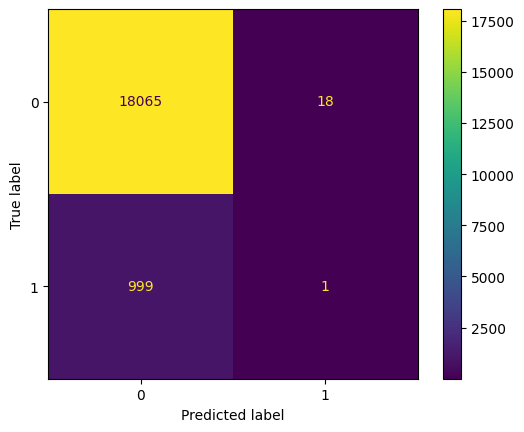

In [18]:
new_model = RandomForestClassifier(
    n_estimators = best_n_estimators,
    max_depth = best_max_depth,
    min_samples_split = best_min_samples_split,
    min_samples_leaf = best_min_samples_leaf,  
    random_state = 12
)

new_model.fit(X_train_SMOTE, y_train_SMOTE)

print("The recall metric for the Random Forest in the TRAIN set is {:.2f}".format(new_model.score(X_train_SMOTE, y_train_SMOTE)))
print("The recall metric for the Random Forest in the TEST  set is {:.2f}".format(new_model.score(X_test, y_test)))

y_test_pred = new_model.predict(X_test)

cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels = new_model.classes_);
disp.plot()

In [19]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18083
           1       0.05      0.00      0.00      1000

    accuracy                           0.95     19083
   macro avg       0.50      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083



In [21]:
fn = X_test.index[(y_test == 1) & (y_test_pred == 0)]
fn_filter = data.loc[fn]
fn_filter['TARGET_D'].sum()

16096.03

As it can be seen above - even with the grid search and improving the selected metric we were only able to reduce by 1 the number of false negatives. 
At least we could save the company $5. 